# Космическое излучение

Загружаем данные

### Цель работы: Определение средней энергии вторичного космического излучения по их пробегу в веществе.
### Студент: Воропаев Роберт, 691 гр
### Курирующий преподаватель: Михаил Зелёный

## Установка

Установка состоит из двух счетчиков Гейгера-Мюллера, набора свинцовых пластин, которые можно вдвигать в зазор между счетчиками и блока управления и индикации. Установка может поворачиваться вокруг оси крепления его к стойке на угол, считываемый на круговом лимбе прибора.

Блок управления и индикации содержит:
<ul>
    <li> Таймер с максимальным временем измерения 999 с
    <li> Высоковольтный выпрямитель для питания счетчиков
    <li> Схема совпадений, которая формирует сигнал только если сигналы с двух счетчиков совпадают во времени с некоторой точностью ($t \approx 1 \text{мкс}$)
    <li> Блок пересчета импульсов
</ul>

<html>
 <body>
  <p><img src="data/device.jpg" alt="Установка"></p>
 </body>
</html>

## Выполнение работы

Подключаем необходимые библиотеки

In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

Загружаем данные с каждой из установок

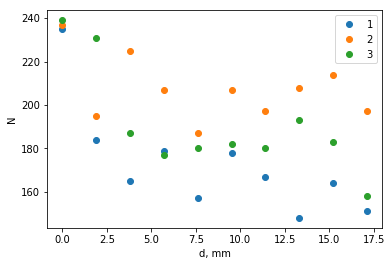

In [3]:
data = pd.read_csv('data/data.csv', sep = '\t') #данные измерений с установок
time = data.time

#данные с каждой из установок
imp1 = data.imp1
imp2 = data.imp2
imp3 = data.imp3

num = np.array(data.num) #количество свинцовых пластин
d0 = 1.9 #толщина пластины
p_pb = 11.3 #плотность свинца
d = num * d0 

plt.plot(d, imp1, "o", label="1")
plt.plot(d, imp2, "o", label="2")
plt.plot(d, imp3, "o", label="3")

plt.xlabel("d, mm")
plt.ylabel("N")
plt.legend()
plt.show()

## Определение среднего пробега

Суммируем данные с установок

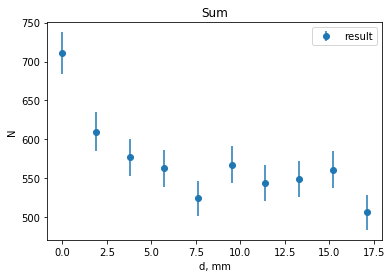

In [4]:
imp = imp1 + imp2 + imp3
imp_err = np.sqrt(imp)

plt.title("Sum")
plt.errorbar(d, imp, yerr=imp_err, label="result", fmt="o")
plt.xlabel("d, mm")
plt.ylabel("N")
plt.legend()
plt.show()

Апроксимируем график

In [13]:
#фитирующая функция
def fit_func(x, a, b, c):
    L = x * d0 * p_pb
    return c * np.exp(-L/a) + b

49.85158115063842 540.3974278249052 169.1625501498648
15.60503238640902 9.29453469527686 23.937070963664407


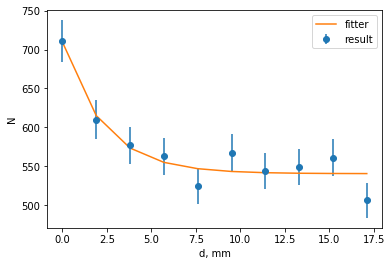

In [5]:
popt, pcov = curve_fit(fit_func, d, imp, sigma=imp_err, p0=[10, 300, 70])
a, b, c = popt
a_err, b_err, c_err = np.sqrt([pcov[0][0], pcov[1][1], pcov[2][2]])
print(a, b, c)
print(a_err, b_err, c_err)

plt.errorbar(d,imp, yerr=imp_err, label="result", fmt="o")
plt.plot(d, fit_func(d, *popt), label="fitter")
plt.legend()
plt.xlabel("d, mm")
plt.ylabel("N")
plt.show()

Найдем средний пробег и ошибку

In [6]:
lam = a / p_pb * 10
lam_err = a_err / p_pb * 10
print("lambda =", lam, "mm")
print("lambda_error =", lam_err, "mm")

lambda = 44.116443496140185 mm
lambda_error = 13.809763173813291 mm


## Определение средней энергии

Воспользуемся результатами моделирования прохождения частиц в свинце

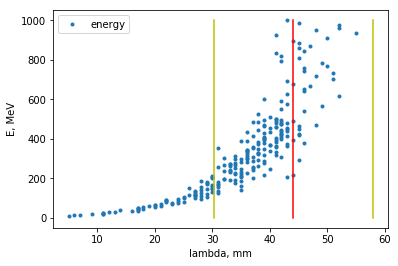

In [7]:
result = pd.DataFrame(np.load('data/result.npy')) #моделирования прохождение электрона в свинце
plt.plot(result.ranges, result.energy, ".")
plt.xlabel("lambda, mm")
plt.ylabel("E, MeV")

#строим среднюю энергию
y = [0,  1000]
lam_x = [lam] * 2
plt.plot(lam_x, y, 'r')

#строим ошибку
err_x_1 = [lam - lam_err] * 2
err_x_2 = [lam + lam_err] * 2
plt.plot(err_x_1, y, "y")
plt.plot(err_x_2, y, "y")
plt.legend()
plt.show()

Для апроксимации перейдем к логарифмическому масштабу

In [8]:
def line(x, a, b):
    return a * x + b

popt, pcov = curve_fit(line, result.ranges, np.log(result.energy))
a, b = popt
a_err, b_err = np.sqrt([pcov[0][0], pcov[1][1]])
print(a, b)
print(a_err, b_err)

0.0905739564804795 2.3428135580565206
0.0018032681783549894 0.06535489375234879


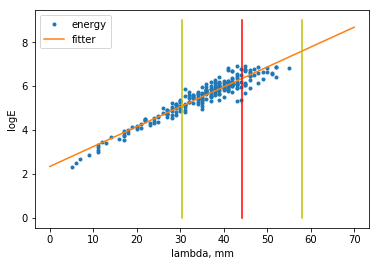

In [9]:
x = np.linspace(0, 70, 100)
plt.plot(result.ranges, np.log(result.energy), ".")
plt.plot(x, line(x, *popt), label="fitter")
plt.xlabel("lambda, mm")
plt.ylabel("logE")

y = [0,  9]
plt.plot(lam_x, y, 'r')
plt.plot(err_x_1, y, "y")
plt.plot(err_x_2, y, "y")
plt.legend()
plt.show()

In [10]:
log_E = line(lam, a, b)
log_E_error_1 = line(lam - lam_err, a, b)
log_E_error_2 = line(lam + lam_err, a, b)
print(log_E, log_E_error_1, log_E_error_2)

6.338614391349455 5.087809502638761 7.589419280060148


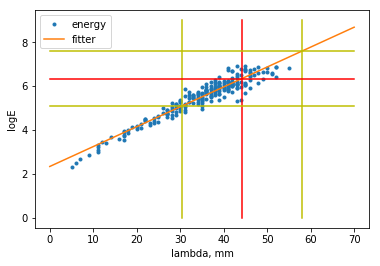

In [11]:
x = np.linspace(0, 70, 100)
plt.plot(result.ranges, np.log(result.energy), ".")
plt.plot(x, line(x, *popt), label="fitter")
plt.xlabel("lambda, mm")
plt.ylabel("logE")

y = [0,  9]
plt.plot(lam_x, y, 'r')
plt.plot(err_x_1, y, "y")
plt.plot(err_x_2, y, "y")

x = [0, 70]
log_E_y = [log_E] * 2
log_E_error_1_y = [log_E_error_1] * 2
log_E_error_2_y = [log_E_error_2] * 2
plt.plot(x, log_E_y, 'r')
plt.plot(x, log_E_error_1_y, "y")
plt.plot(x, log_E_error_2_y, "y")

plt.legend()
plt.show()

In [12]:
E = np.exp(log_E)
E_err = (E - np.exp(log_E_error_1))
print(E, E_err)

566.0114973575633 403.9769605568009


## Результаты

Мы определили среднюю энергию электронов вторичного космического излучения:

$E = 566 \pm 404$ $МэВ$.

## Список литературы

<ol>
    <li> Сивухин Д.В. Общий курс физики: Атомная и ядерная физика. </li>
    <li> Игошин Ф.Ф., Самарский Ю.А., Ципенюк Ю.М. Лабораторный практикум по общей физике: Квантовая физика. </li>
    <li> Мурзин В.С. Введение в физику космических лучей. </li>
    
</ol>

# Спасибо за внимание!